In [1]:
from matplotlib import dates # to load dates library from matplotlib
import matplotlib.pyplot as plt # to import general matplotlib plotting library
import numpy as np # numPy
import pandas as pd # pandas
import yfinance as yf # Yfinance

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] # using a list comprehension to extract the first entry for each tuple in 
                                        # the multi-index from .columns ^above^
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

import yfinance as yf
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] 
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.516529,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.412874,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.401019,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.443574,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2019-12-23,69.451057,71.000000,71.062500,70.092499,70.132500
2019-12-24,69.517082,71.067497,71.222504,70.730003,71.172501
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002


## CandleStick Plot from scratch

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


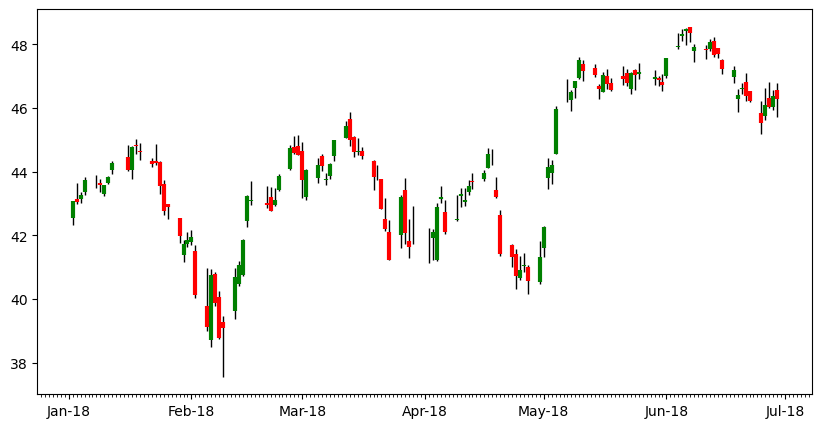

In [11]:
# Making a candlestick plot using pandas as a matplotlib

fig, ax = plt.subplots(figsize=(10,5))
def plot_candle(df, ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors = 'k', linewidth = 1)
    # red - decrease
    red = df.query('Open > Close')
    ax.vlines(x = red.index, ymin = red.Close, ymax = red.Open, colors = 'r', linewidth = 3)
    # green - increase
    green = df.query('Open <= Close')
    ax.vlines(x = green.index, ymin = green.Close, ymax = green.Open, colors = 'g', linewidth = 3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df
    
    
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['jan 2018':'jun 2018']
 .pipe(plot_candle, ax)
)